# VEHICLE SALES ANALYSIS AND PREDICTION

**IMPORTING LIBRARIES**

In [19]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans

In [20]:
# Matplotlib Configuration and Styling Setup

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

**LOADING DATA**



In [3]:
# Read Dataset

vehicle_sales_df = pd.read_csv("/content/car_prices.csv", usecols=['year', 'make','model', 'trim', 'body', 'transmission', 'state', 'condition', 'odometer', 'color', 'interior', 'seller', 'mmr', 'sellingprice', 'saledate'])


In [4]:
vehicle_sales_df.shape

(6576, 15)

In [5]:
len(vehicle_sales_df)

6576

In [6]:
# Display dataset information

vehicle_sales_df.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6576 entries, 0 to 6575
Columns: 15 entries, year to saledate
dtypes: float64(2), int64(3), object(10)
memory usage: 4.5 MB


In [7]:
vehicle_sales_df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr               int64
sellingprice      int64
saledate         object
dtype: object

**DATA CLEANING AND PROCESSING**



In [8]:


data = pd.read_csv("/content/car_prices.csv")
columns_to_check = ["year", "make", "model", "trim", "body", "transmission", "vin", "state", "condition", "odometer", "color", "interior", "seller", "mmr", "sellingprice", "saledate"]

# Check for null values in specified columns
null_values = data[columns_to_check].isnull().sum()

print("Null values in each column:")
print(null_values)


Null values in each column:
year               0
make              30
model             31
trim              71
body             287
transmission    1359
vin                0
state              0
condition       2032
odometer          12
color             34
interior          34
seller             0
mmr                0
sellingprice       0
saledate           0
dtype: int64


In [9]:
# Check for Repetition
vehicle_sales_df.duplicated().sum()

0

**Handelling missing data By MICE imputation**  

*1.Converting the categorical data to numerical data*

*2.replacing the null values by tranforming*

**OneHotEncoder**


In [21]:
data = pd.read_csv("/content/car_prices.csv")

In [10]:
data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [12]:
X= data.drop("sellingprice",axis=1)
Y= data["sellingprice"]

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_featurtes = ["make","model","trim","body","transmission","vin","state","color","interior","seller","saledate"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_featurtes)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

<33442x41659 sparse matrix of type '<class 'numpy.float64'>'
	with 501630 stored elements in Compressed Sparse Row format>

In [14]:
car =pd.DataFrame(transformed_X)
car

,0
0,"(0, 22)\t1.0\n (0, 642)\t1.0\n (0, 1571)\t..."
1,"(0, 22)\t1.0\n (0, 642)\t1.0\n (0, 1571)\t..."
2,"(0, 2)\t1.0\n (0, 97)\t1.0\n (0, 1081)\t1...."
3,"(0, 46)\t1.0\n (0, 588)\t1.0\n (0, 1842)\t..."
4,"(0, 2)\t1.0\n (0, 117)\t1.0\n (0, 1219)\t1..."
...,...
33437,"(0, 18)\t1.0\n (0, 436)\t1.0\n (0, 1618)\t..."
33438,"(0, 22)\t1.0\n (0, 498)\t1.0\n (0, 1571)\t..."
33439,"(0, 21)\t1.0\n (0, 510)\t1.0\n (0, 1824)\t..."
33440,"(0, 22)\t1.0\n (0, 330)\t1.0\n (0, 1390)\t..."


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


*Null values after imputation*

In [15]:
null_values = car.isnull().sum()

print("Null values in each column:")
print(null_values)

Null values in each column:
0    0
dtype: int64


**OUTLIERS**

In [18]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt


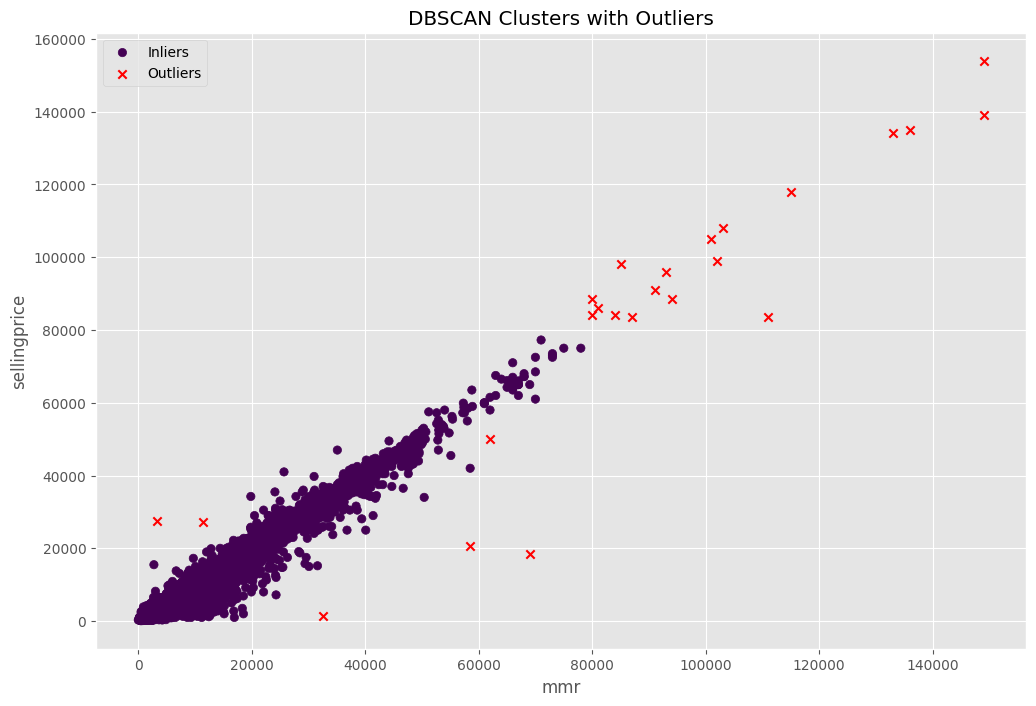

In [17]:
# Calculate the mean of each column
mmr_mean = vehicle_sales_df['mmr'].mean()
sellingprice_mean = vehicle_sales_df['sellingprice'].mean()

# Fill NaN values with the mean of each column
vehicle_sales_df['mmr'].fillna(mmr_mean, inplace=True)
vehicle_sales_df['sellingprice'].fillna(sellingprice_mean, inplace=True)

# Extract the imputed values into X
X = vehicle_sales_df[['mmr', 'sellingprice']].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform DBSCAN clustering
eps = 0.5  # Adjust as needed
min_samples = 5  # Adjust as needed
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(X_scaled)

# Extract outliers
labels = dbscan.labels_
outliers_mask = labels == -1
outliers = X[outliers_mask]

# Filter outliers from the dataset
cleaned_X = X[~outliers_mask]

# Plot the clusters with outliers
plt.scatter(cleaned_X[:, 0], cleaned_X[:, 1], c=labels[~outliers_mask], label='Inliers')
plt.scatter(outliers[:, 0], outliers[:, 1], c='red', marker='x', label='Outliers')
plt.xlabel('mmr')
plt.ylabel('sellingprice')
plt.title('DBSCAN Clusters with Outliers')
plt.legend()
plt.show()


AFTER REMOVING OUTLIERS

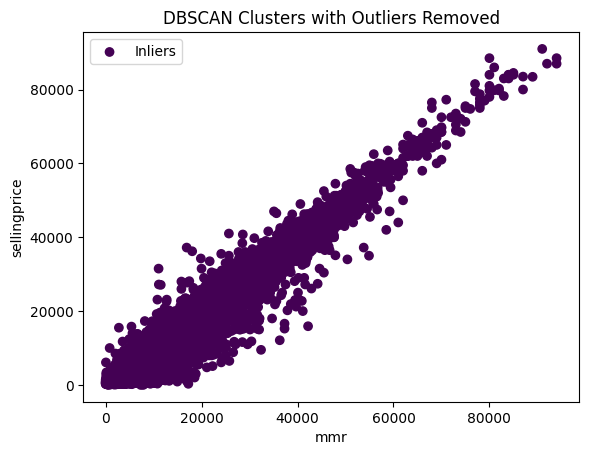

In [ ]:
# Filter outliers from the dataset
cleaned_X = X[~outliers_mask]

# Plot the clusters with outliers removed
plt.scatter(cleaned_X[:, 0], cleaned_X[:, 1], c=labels[~outliers_mask], label='Inliers')
plt.xlabel('mmr')
plt.ylabel('sellingprice')
plt.title('DBSCAN Clusters with Outliers Removed')
plt.legend()
plt.show()

**DATA VISUALIZATION AND ANALYSIS**






In [ ]:
vehicle_sales_df.describe()

,year,condition,odometer,mmr,sellingprice
count,26720.000000,19003.000000,26685.000000,26720.000000,26720.000000
mean,2008.384244,28.535021,88361.881319,11300.335891,10914.383271
std,3.653731,13.390753,56550.902434,9436.409596,9435.270854
min,1986.000000,1.000000,1.000000,25.000000,1.000000
25%,2006.000000,21.000000,40750.000000,4500.000000,4100.000000
50%,2008.000000,29.000000,86450.000000,8900.000000,8500.000000
75%,2011.000000,39.000000,123885.000000,15750.000000,15300.000000
max,2015.000000,49.000000,999999.000000,157000.000000,154000.000000


Univarient Analysis

Skewness of year: -1.1543182143128603
Kurtosis of year: 0.9400013310672288


<ipython-input-17-4484f4e10184>:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col])


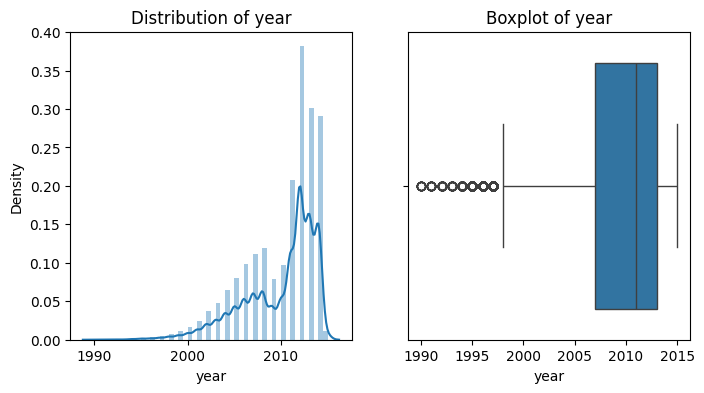

Skewness of odometer: 2.019647479165081
Kurtosis of odometer: 17.25144972827964


<ipython-input-17-4484f4e10184>:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col])


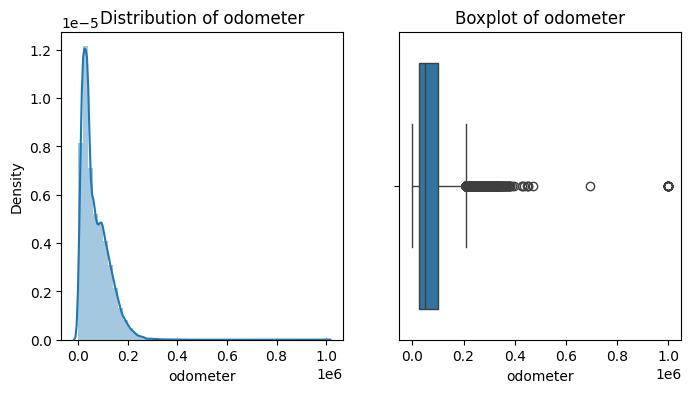

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize counter
count = 0

# Iterate through columns in X
for col in X.columns:
    # Check if the counter has reached 2
    if count >= 2:
        break

    # Exclude specific columns
    if col not in ['make', 'model', 'trim', 'color', 'condition']:
        # Check if the column is numeric
        if X[col].dtype != 'object':
            # Calculate skewness and kurtosis
            skewness = X[col].skew()
            kurtosis = X[col].kurt()

            # Print skewness and kurtosis
            print("Skewness of {}:".format(col), skewness)
            print("Kurtosis of {}:".format(col), kurtosis)

            # Plot distribution and boxplot
            plt.figure(figsize=(8, 4))
            plt.subplot(1, 2, 1)
            sns.distplot(X[col])
            plt.title("Distribution of {}".format(col))
            plt.subplot(1, 2, 2)
            sns.boxplot(x=X[col])
            plt.title("Boxplot of {}".format(col))
            plt.show()

            # Increment the counter
            count += 1


Correlation Heatmap

<Axes: >

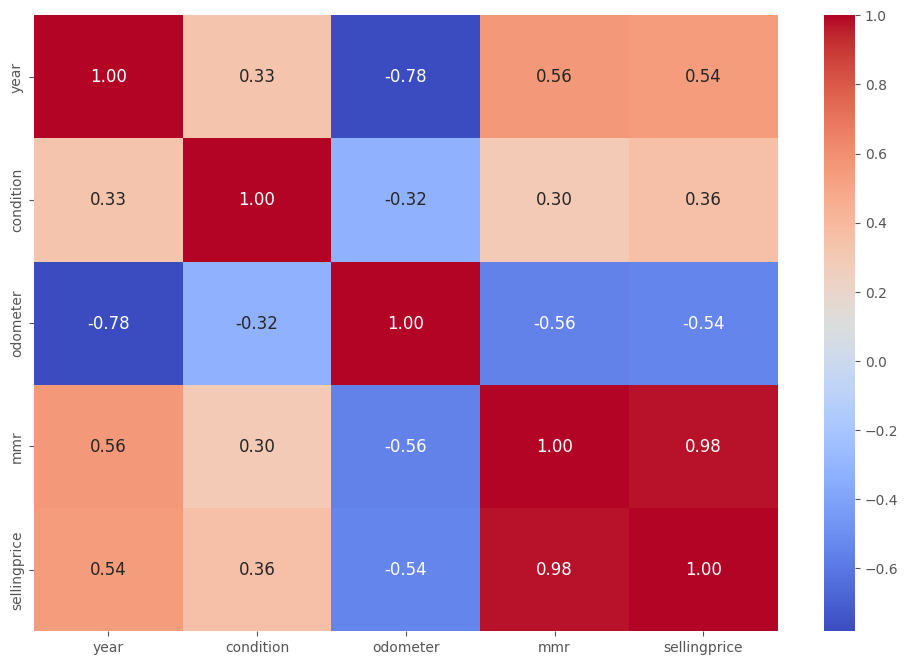

In [40]:
# Select only numeric columns
numeric_df = vehicle_sales_df.select_dtypes(include=['number'])

# Compute correlations using only numeric columns
correlation_matrix = vehicle_sales_df.select_dtypes(include=['number']).corr(method='pearson')

# Plotting correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 12}, xticklabels=1, yticklabels=1)


Summary of Correlation Findings:
1. Odometer and year: Strong Negative correlation
2. MMR and selling price: Strong Positive correlation
3. MMR and odometer: Moderate Negative correlation
4. Year and selling price: Moderate Positive correlation
5. Selling price and odometer: Moderate Negative correlation


Odometer vs Car Year Model

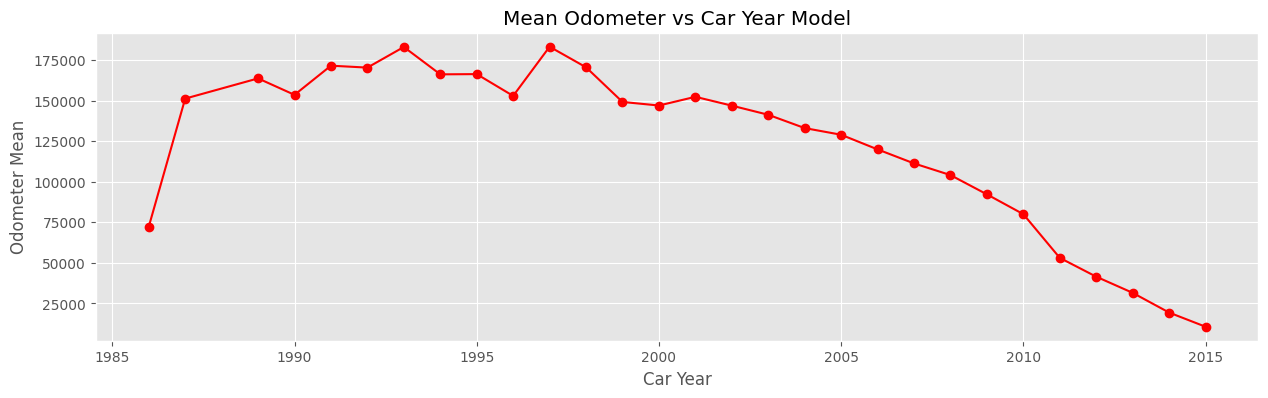

In [ ]:
# Calculate the mean odometer for each car year model
mean_odometer_by_year = vehicle_sales_df.groupby('year')['odometer'].mean()

# Plotting the mean odometer each car year model
plt.figure(figsize=(15, 4))
plt.plot(mean_odometer_by_year.index, mean_odometer_by_year.values, marker='o', color='red')
plt.title('Mean Odometer vs Car Year Model')
plt.xlabel('Car Year')
plt.ylabel('Odometer Mean')
plt.grid(True)
plt.show()

Visualizing the Relationship between Odometer, Year and Selling Price

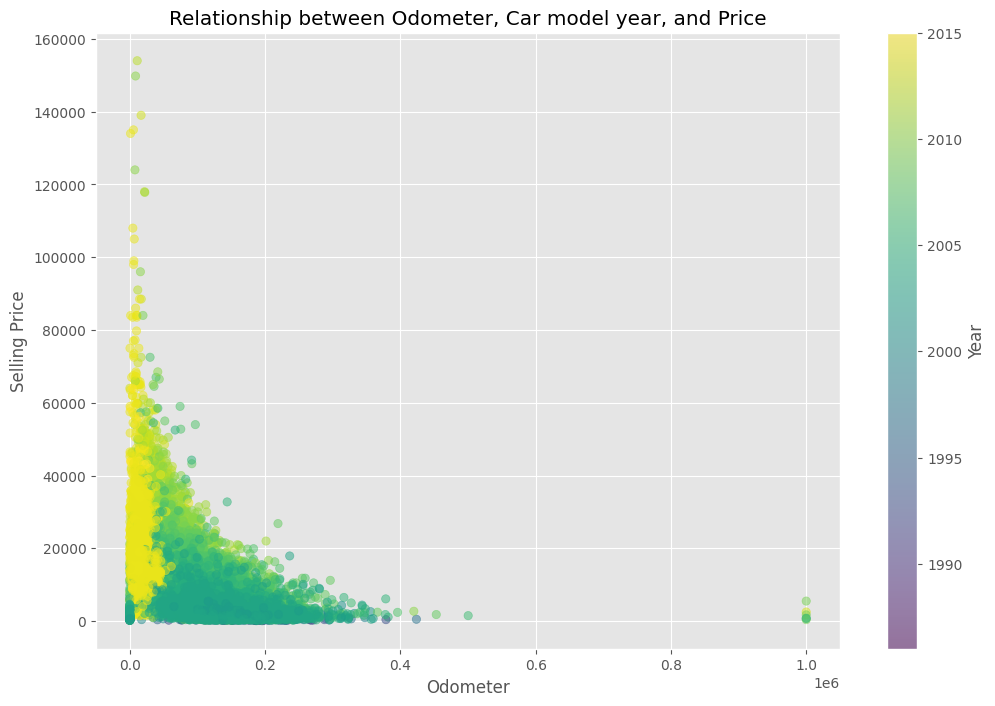

In [ ]:
# Plotting odometer vs. price with color representing the year
scatter = plt.scatter(vehicle_sales_df['odometer'], vehicle_sales_df['sellingprice'], c=vehicle_sales_df['year'], cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label='Year')
plt.title('Relationship between Odometer, Car model year, and Price')
plt.xlabel('Odometer')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()


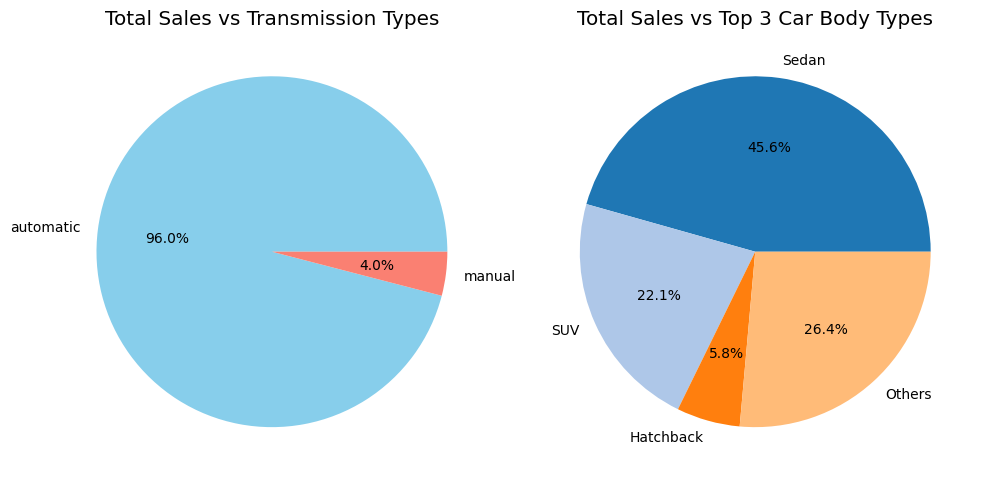

In [24]:
transmission_counts = vehicle_sales_df['transmission'].value_counts()


# Plotting two pie charts for transmission types in one plot
plt.figure(figsize=(10, 5))

# First pie chart
plt.subplot(1, 2, 1)
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Total Sales vs Transmission Types')

# Second pie chart

car_body_counts = vehicle_sales_df['body'].value_counts()
# Select the top 10 most common car body types
top_car_body = car_body_counts.head(3)
other_sales = car_body_counts.iloc[3:].sum()
top_car_body['Others'] = other_sales

plt.subplot(1, 2, 2)
plt.pie(top_car_body, labels=top_car_body.index, autopct='%1.1f%%', colors=plt.cm.tab20.colors)
plt.title('Total Sales vs Top 3 Car Body Types')

plt.tight_layout()
plt.show()


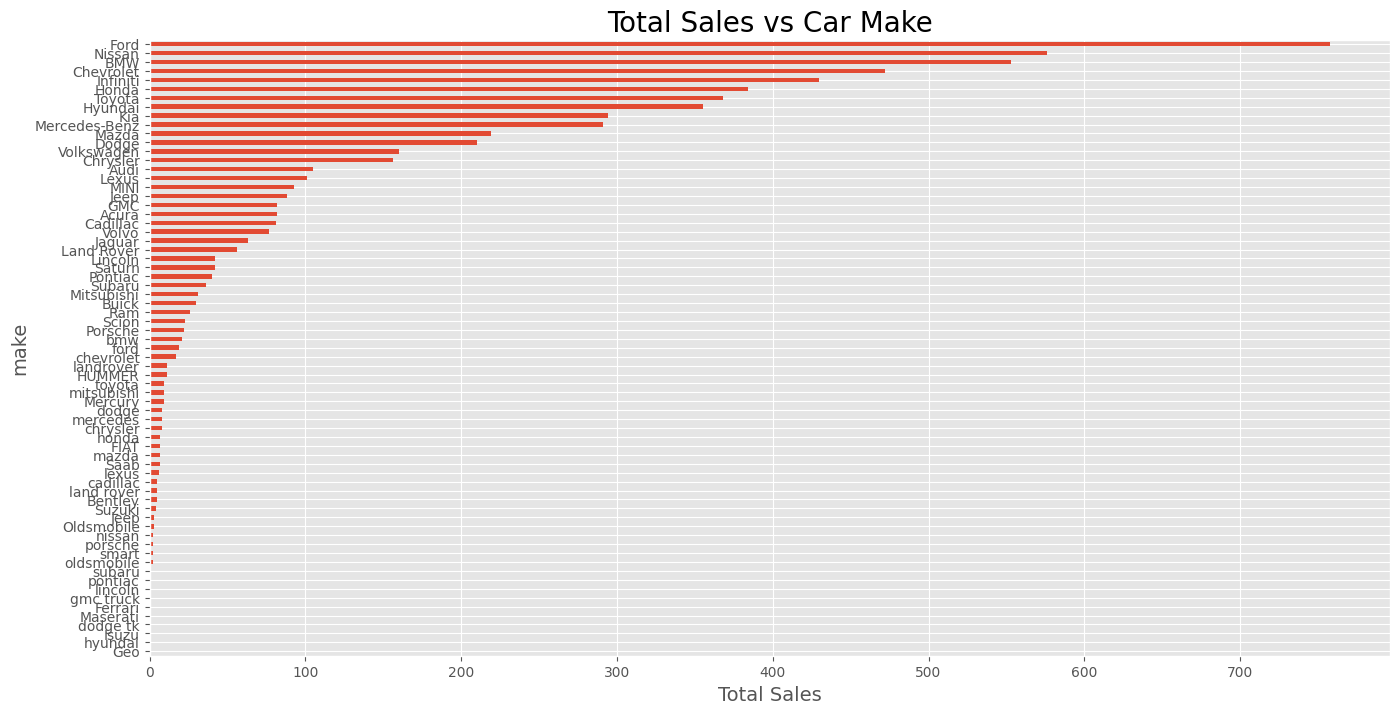

In [25]:
# Plotting Total Sales vs States
vehicle_sales_df['make'].value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(16,8))
plt.xlabel('Total Sales', fontsize=14)
plt.ylabel('make', fontsize=14)
plt.title('Total Sales vs Car Make',  fontsize=20)
plt.grid(True)
plt.show()

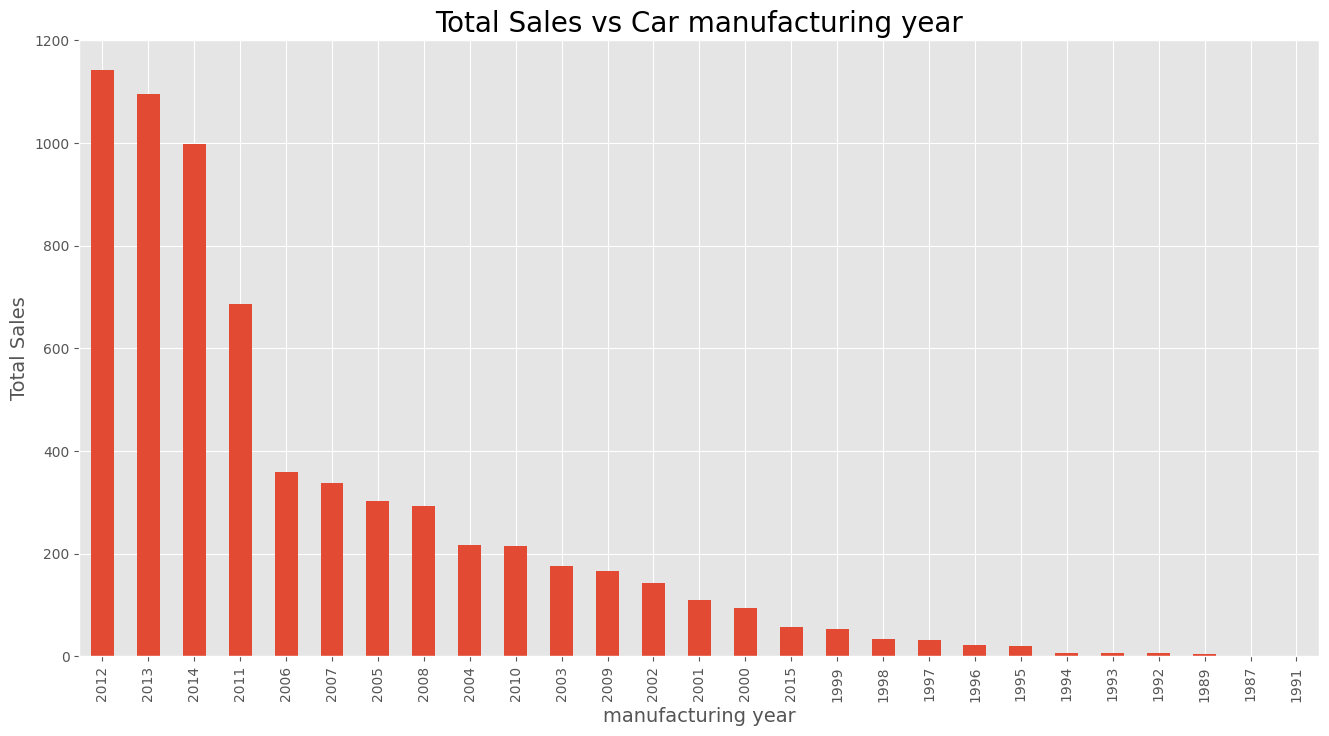

In [26]:
# Plotting Total Sales vs Car manufacturing year
vehicle_sales_df['year'].value_counts().sort_values(ascending=False).plot(kind='bar', figsize=(16,8))
plt.xlabel('manufacturing year', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.title('Total Sales vs Car manufacturing year',  fontsize=20)
plt.grid(True)
plt.show()

In [ ]:
# Generating a Boxplot of Car Models Across Sale Years
sns.boxplot(data=vehicle_sales_df, x='saleyear', y='year')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Car Model', fontsize=14)
plt.title('Distribution of Car Models over Different Years', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
# Summarizing "Total Sales vs Car Registration state" plot
summary = (
    vehicle_sales_df
    .groupby('state')
    .size()
    .sort_values(ascending=False)
    .to_frame('Total sales')
    .reset_index()
)

summary.head()
#CA: California FL: Florida TX: Texas GA: Georgia OH: Ohio

,state,Total sales
0,ca,6576


In [28]:
# Group the data by 'state' and 'make' and count the occurrences of each make within each state
state_make_gr = vehicle_sales_df.groupby(['state', 'make']).size().reset_index(name='records_count')

state_make_max_gr = state_make_gr.loc[state_make_gr.groupby('state')['records_count'].idxmax()]

make_records_sum = state_make_max_gr.groupby('make')['records_count'].sum()

total_records_count = make_records_sum.sum()

pct_make_state_max = round((make_records_sum / total_records_count) * 100,2)

pct_make_state_max_sorted_df = pct_make_state_max.to_frame(name='percentage').sort_values(by='percentage', ascending=False)

pct_make_state_max_sorted_df.head()



,percentage
make,
Ford,100.0


**Feature-based Sales Analysis**

**MODEL BULIDING**

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import NearestNeighbors
import scipy
from sklearn.metrics import silhouette_score


In [ ]:
pip install pandas scikit-learn matplotlib

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt

# Load the car dataset (replace 'car_prices.csv' with your dataset)
car_data = pd.read_csv('/content/car_prices.csv')
# Drop any rows with missing values
car_data.dropna(inplace=True)

# Feature Selection
# Let's say we're predicting the price based on 'condition' and 'year'
features = ['condition', 'year']
X = car_data[features]
y = car_data['sellingprice']

# Perform feature selection using SelectKBest and f_regression
selector = SelectKBest(score_func=f_regression, k=min(2, len(features)))
X_selected = selector.fit_transform(X, y)

# Get selected feature indices
selected_indices = selector.get_support(indices=True)

# Get selected feature names
selected_feature_names = X.columns[selected_indices]
print("Selected Features:", selected_feature_names)




Selected Features: Index(['condition', 'year'], dtype='object')


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


# Data Cleaning
car_data.dropna(inplace=True)
data_correlation = car_data.drop(columns=["color", "interior","seller"])
# Drop non-numeric columns (like product codes)
data_numeric = data_correlation.select_dtypes(include=np.number)
# Calculate correlation matrix
correlation_matrix = data_numeric.corr()
correlation_matrix

,year,condition,odometer,mmr,sellingprice
year,1.000000,0.334760,-0.773102,0.588614,0.578933
condition,0.334760,1.000000,-0.314205,0.276521,0.317712
odometer,-0.773102,-0.314205,1.000000,-0.582654,-0.577397
mmr,0.588614,0.276521,-0.582654,1.000000,0.983493
sellingprice,0.578933,0.317712,-0.577397,0.983493,1.000000


In [ ]:

# Get absolute correlation values with the target variable ('sellingrice')
correlation_with_target = abs(correlation_matrix['sellingprice']).sort_values(ascending=False)

# Select top correlated features (excluding 'TotalPrice' itself)
selected_features = correlation_with_target[1:].index.tolist()
selected_features

['mmr', 'year', 'odometer', 'condition']

In [ ]:
# Further Feature Selection based on selected features
X = car_data[selected_features]
y = car_data['sellingprice']

# Perform feature selection using SelectKBest and f_regression
selector = SelectKBest(score_func=f_regression, k=min(2, len(selected_features)))
X_selected = selector.fit_transform(X, y)

# Get selected feature indices
selected_indices = selector.get_support(indices=True)

# Get selected feature names
selected_feature_names = X.columns[selected_indices]

print("Selected Features:", selected_feature_names)

Selected Features: Index(['mmr', 'year'], dtype='object')


Mean Squared Error: 2853632.4904979654


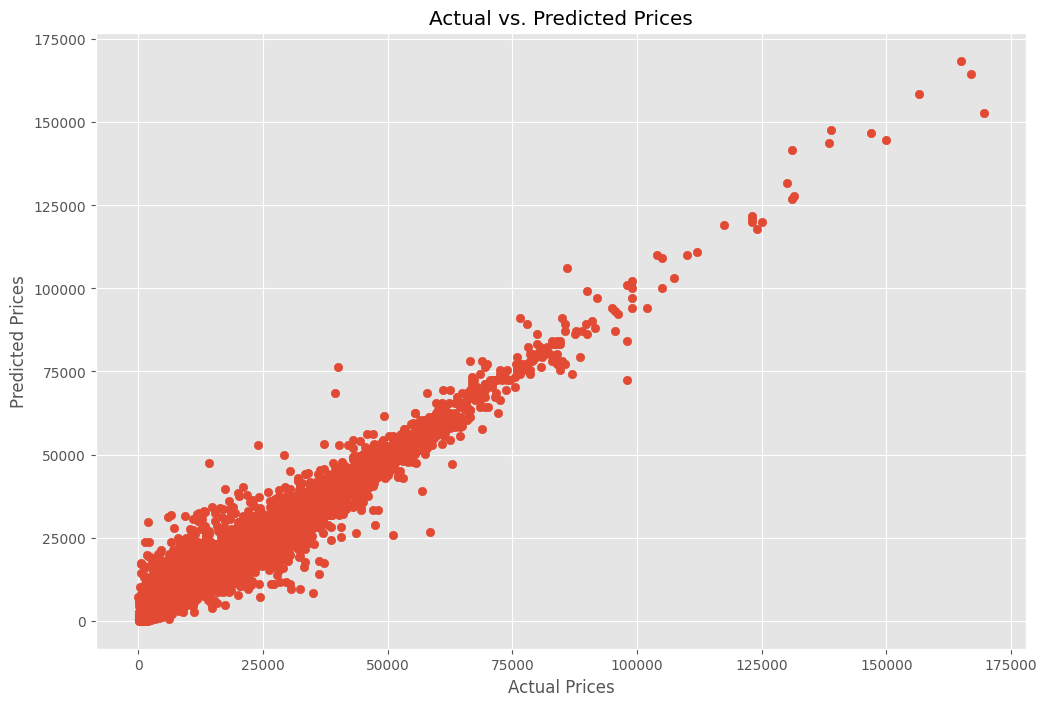

In [ ]:

# Feature Selection
features = ['mmr', 'year']
X = car_data[features]
y = car_data['sellingprice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)

# Visualize predictions vs. actual prices
plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()


feature extraction

In [ ]:

# Data Splitting for Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (using StandardScaler on the training data)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Train a Linear Regression model (using scaled features)
model = LinearRegression()
model.fit(scaled_X_train, y_train)

# Make predictions on the testing set (using scaled features)
predictions = model.predict(scaled_X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)

# Print the intercept and coefficients of the model
print('Model Intercept:', model.intercept_)
print('Model Coefficients:', model.coef_)



Mean Squared Error: 2853632.4904979654
Model Intercept: 13696.451699041972
Model Coefficients: [9.47000457e+03 3.63612815e+00]


By using StandardScaler, you can ensure that all features in your data have a similar range, which can improve the performance of some machine learning algorithms. This is particularly important when features have different units or scales, as it prevents features with larger scales from dominating the model during training.


The model predicts selling prices with an intercept of $13,696.45 and coefficients of $ 9,470.00 and $ 3.64 for the first and second features respectively. However, the high MSE of approximately 2,853,632.49 indicates considerable error, suggesting potential inadequacies in the model's predictive ability.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np

# Load the car dataset (replace 'car_prices.csv' with your dataset)
car_data = pd.read_csv('/content/car_prices.csv')

# Data Preprocessing
car_data.dropna(inplace=True)

# Define features and target variable
features = ['year', 'make', 'model', 'trim', 'odometer', 'color', 'condition']
X = car_data[features]
y = car_data['sellingprice']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R2) Score:', r2)


Mean Squared Error (MSE): 6109036.472591552
Root Mean Squared Error (RMSE): 2471.6465104443137
Mean Absolute Error (MAE): 1507.3291007290354
R-squared (R2) Score: 0.9269249095388384


The model exhibits strong predictive performance with low error measures: Mean Squared Error (MSE) of 6,109,036.47, Root Mean Squared Error (RMSE) of 2,471.65, and Mean Absolute Error (MAE) of 1,507.33. Additionally, the high R-squared (R2) score of 0.93 indicates excellent fit to the data.
